In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [4]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(columns = ['Cabin','Ticket','Name','PassengerId'],axis = 1,inplace = True)

In [10]:
df.dropna(inplace =True)

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
train_x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
472,1,2,female,33.0,1,2,27.7500,S
432,1,2,female,42.0,1,0,26.0000,S
666,0,2,male,25.0,0,0,13.0000,S
30,0,1,male,40.0,0,0,27.7208,C
291,1,1,female,19.0,1,0,91.0792,C
...,...,...,...,...,...,...,...,...
93,0,3,male,26.0,1,2,20.5750,S
135,0,2,male,23.0,0,0,15.0458,C
338,1,3,male,45.0,0,0,8.0500,S
549,1,2,male,8.0,1,1,36.7500,S


In [13]:
X = train_x.drop(columns = ['Survived'],axis = 1)
y_label= train_x['Survived']
X_num = X.drop(columns = ['Sex','Embarked'])

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
472,2,female,33.0,1,2,27.7500,S
432,2,female,42.0,1,0,26.0000,S
666,2,male,25.0,0,0,13.0000,S
30,1,male,40.0,0,0,27.7208,C
291,1,female,19.0,1,0,91.0792,C
...,...,...,...,...,...,...,...
93,3,male,26.0,1,2,20.5750,S
135,2,male,23.0,0,0,15.0458,C
338,3,male,45.0,0,0,8.0500,S
549,2,male,8.0,1,1,36.7500,S


In [14]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [15]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.240773,29.582021,0.513181,0.405975,32.053566
std,0.832879,14.194751,0.934615,0.842552,46.621635
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,14.458300
75%,3.000000,38.000000,1.000000,1.000000,31.000000
max,3.000000,80.000000,5.000000,6.000000,512.329200


In [16]:
X.Embarked.value_counts()

S    453
C     98
Q     18
Name: Embarked, dtype: int64

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
num_attribs = list(X_num)
cat_attribs = ['Sex','Embarked']

full_pipeline = ColumnTransformer([
    ('simple',SimpleImputer( strategy='mean'),num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])


In [23]:
train_x = full_pipeline.fit_transform(X)

In [24]:
y_label = np.asanyarray(y_label)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(train_x, y_label)

KNeighborsClassifier()

In [26]:
X_test = test_x.drop(columns = ['Survived'],axis = 1)
y_test_label= test_x['Survived']
X_test_num = X.drop(columns = ['Sex','Embarked'])

In [27]:
rain_x = full_pipeline.fit_transform(X_test)

In [28]:
knn.predict(rain_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [29]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test_label, knn.predict(rain_x))

0.5116279069767442

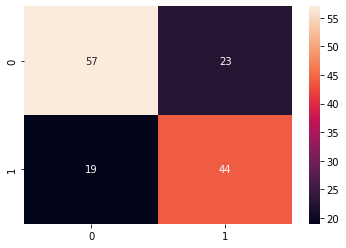

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test_label, knn.predict(rain_x)), annot=True)
plt.show()

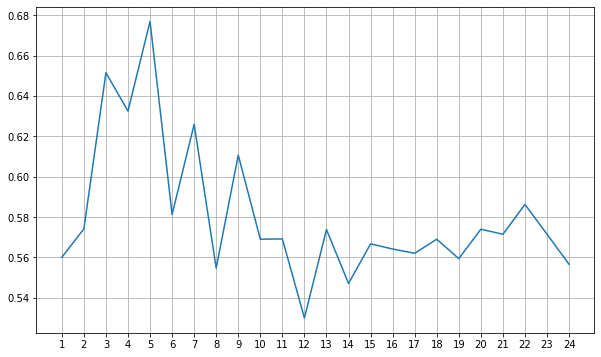

In [31]:
from sklearn.metrics import f1_score
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(train_x, y_label)
    y_predict = knn.predict(rain_x)
    f1.append(f1_score(y_test_label, knn.predict(rain_x)))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [32]:
train_x

array([[ 2.  , 33.  ,  1.  , ..., 27.75,  0.  ,  2.  ],
       [ 2.  , 42.  ,  1.  , ..., 26.  ,  0.  ,  2.  ],
       [ 2.  , 25.  ,  0.  , ..., 13.  ,  1.  ,  2.  ],
       ...,
       [ 3.  , 45.  ,  0.  , ...,  8.05,  1.  ,  2.  ],
       [ 2.  ,  8.  ,  1.  , ..., 36.75,  1.  ,  2.  ],
       [ 3.  , 20.  ,  0.  , ...,  7.05,  1.  ,  2.  ]])

In [33]:
train_x

array([[ 2.  , 33.  ,  1.  , ..., 27.75,  0.  ,  2.  ],
       [ 2.  , 42.  ,  1.  , ..., 26.  ,  0.  ,  2.  ],
       [ 2.  , 25.  ,  0.  , ..., 13.  ,  1.  ,  2.  ],
       ...,
       [ 3.  , 45.  ,  0.  , ...,  8.05,  1.  ,  2.  ],
       [ 2.  ,  8.  ,  1.  , ..., 36.75,  1.  ,  2.  ],
       [ 3.  , 20.  ,  0.  , ...,  7.05,  1.  ,  2.  ]])

In [34]:
import pickle

In [35]:
filename = 'finalized_model.sav'

with open(filename,'wb') as f:
  pickle.dump(knn,f)

In [36]:
with open(filename,'rb') as f:
  mod = pickle.load(f)

In [37]:
mod.predict([[2,1,35]])

array([1])